<a href="https://colab.research.google.com/github/SPThole/pyTrch/blob/master/Autograd_pytrch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto-grad and linear regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [2]:
#requires float elements to calculate grad
x= torch.tensor([2.,2.],requires_grad=True)
y= torch.tensor([10.,10],requires_grad=True)

In [3]:
#defining function on tensor args
def w(x,y):
  return torch.sum(x**2+y**2,axis=0)

In [4]:
z=w(x,y) 

In [5]:
#differntiating automatically: Function should give scalar as an output. as z.backwaard() assumes z.backward(torch.tensor([1.0]))
z.backward()

In [6]:
# dz/dx= 2*x
x.grad

tensor([4., 4.])

In [7]:
# dz/dy= 2*y
y.grad

tensor([20., 20.])

In [8]:
print(x.requires_grad)
print(y.requires_grad)
with torch.no_grad():
  print((y**2+x**2).requires_grad)

True
True
False


In [9]:
x.requires_grad
print(x.detach().requires_grad)

False


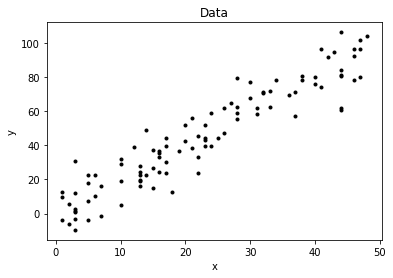

In [10]:
x= np.random.randint(1,50,size=(100,))
y= 2*x+ np.random.normal(size=len(x),scale=10)
plt.plot(x,y,'k.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from torch.optim import SGD

In [13]:
w= torch.rand([2],requires_grad=True)

In [14]:
X_train= torch.from_numpy(X_train.reshape(-1,1))
X_test= torch.from_numpy(X_test.reshape(-1,1))
y_train= torch.from_numpy(y_train.reshape(-1,1))
y_test= torch.from_numpy(y_test.reshape(-1,1))

In [15]:

optimizer= SGD([w],lr=0.0001)

In [16]:
max_iteration=200
history={'train_loss':[],'test_loss':[]}
for i in range(max_iteration):
  loss=torch.mean((y_train-w[0]*X_train-w[1])**2,axis=0)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  history['train_loss'].append(loss.detach().item())
  test_loss= torch.mean((y_test-w[0]*X_test-w[1])**2,axis=0)
  history['test_loss'].append(test_loss.detach().item())

  print('Iteration {}:: Training loss: {} and Test loss: {}'.format(i,loss.detach().item(),test_loss.detach().item()))


Iteration 0:: Training loss: 1160.9776271785718 and Test loss: 412.93310225741715
Iteration 1:: Training loss: 862.5861510570581 and Test loss: 299.9856928194622
Iteration 2:: Training loss: 649.0440472163517 and Test loss: 221.8311316107084
Iteration 3:: Training loss: 496.2240092843582 and Test loss: 168.16364254329386
Iteration 4:: Training loss: 386.85918990112793 and Test loss: 131.67154605172115
Iteration 5:: Training loss: 308.5928769382751 and Test loss: 107.17600744084314
Iteration 6:: Training loss: 252.58210835117546 and Test loss: 91.01620565492088
Iteration 7:: Training loss: 212.49827047330137 and Test loss: 80.6107484607293
Iteration 8:: Training loss: 183.8125152711072 and Test loss: 74.14482130628578
Iteration 9:: Training loss: 163.28374141348007 and Test loss: 70.3471204712048
Iteration 10:: Training loss: 148.59246894054235 and Test loss: 68.33112888220255
Iteration 11:: Training loss: 138.07870131151398 and Test loss: 67.4821116671309
Iteration 12:: Training loss: 

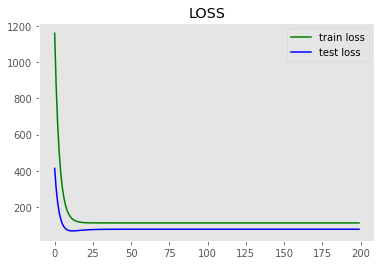

In [17]:
plt.style.use('ggplot')
plt.grid()
plt.plot(np.arange(0,max_iteration),history['train_loss'],'g-',label='train loss')
plt.plot(np.arange(0,max_iteration),history['test_loss'],'b-',label='test loss')
plt.legend()
plt.title('LOSS')
plt.show()


In [18]:
pd.DataFrame(history).tail()

,train_loss,test_loss
195,111.614321,76.839175
196,111.614295,76.839318
197,111.614269,76.839482
198,111.614255,76.839636
199,111.614227,76.839798
